## 1.Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [4]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor

In [5]:
from sklearn.metrics import mean_squared_error,r2_score

## 2.Loading the Dataset

In [7]:
df_train=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Store_sales_data/train_data.csv',parse_dates=['Date'])
df_train.shape

(982644, 9)

In [8]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [9]:
df_test=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Store_sales_data/test_data_hidden.csv',parse_dates=['Date'])
df_test.shape

(34565, 9)

In [10]:
df_test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## 3.Exploratory Data Analysis

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          982644 non-null  int64         
 1   DayOfWeek      982644 non-null  int64         
 2   Date           982644 non-null  datetime64[ns]
 3   Sales          982644 non-null  int64         
 4   Customers      982644 non-null  int64         
 5   Open           982644 non-null  int64         
 6   Promo          982644 non-null  int64         
 7   StateHoliday   982644 non-null  object        
 8   SchoolHoliday  982644 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 67.5+ MB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34565 entries, 0 to 34564
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store          34565 non-null  int64         
 1   DayOfWeek      34565 non-null  int64         
 2   Date           34565 non-null  datetime64[ns]
 3   Sales          34565 non-null  int64         
 4   Customers      34565 non-null  int64         
 5   Open           34565 non-null  int64         
 6   Promo          34565 non-null  int64         
 7   StateHoliday   34565 non-null  int64         
 8   SchoolHoliday  34565 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 2.4 MB


We will merge the two datasets for the ease of performing Exploratory Data Analysis. While building the models, we will separate it again.

In [13]:
df_train['source']='train'
df_test['source']='test'

In [14]:
df_sale=pd.concat([df_train,df_test],ignore_index=True)
df_sale.shape

(1017209, 10)

In [15]:
df_sale.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,source
0,1,2,2015-06-30,5735,568,1,1,0,0,train
1,2,2,2015-06-30,9863,877,1,1,0,0,train
2,3,2,2015-06-30,13261,1072,1,1,0,1,train
3,4,2,2015-06-30,13106,1488,1,1,0,0,train
4,5,2,2015-06-30,6635,645,1,1,0,0,train


In [16]:
## Summary Statistics

In [17]:
df_sale.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [18]:
#Checking for Missing Values

In [19]:
df_sale.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
source           0
dtype: int64

We can see that there are no missing values in the data.

In [20]:
#Separating the numeric columns and plotting them against the target variable

In [21]:
num_cols=df_sale.select_dtypes(include=np.number)
num_cols.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday'],
      dtype='object')

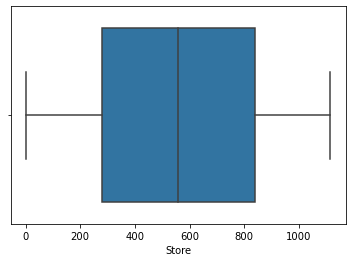

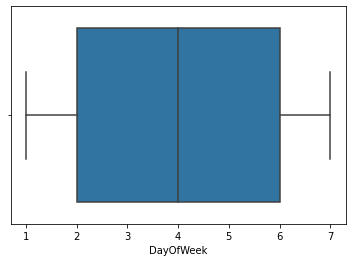

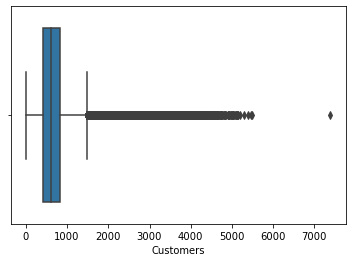

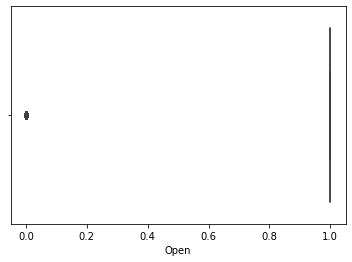

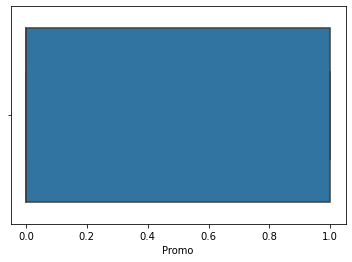

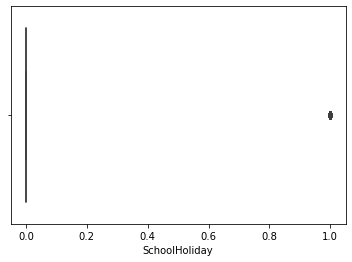

In [22]:
cols=['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'SchoolHoliday']

for col in cols:
    sns.boxplot(x=col,data=df_sale)
    plt.show()

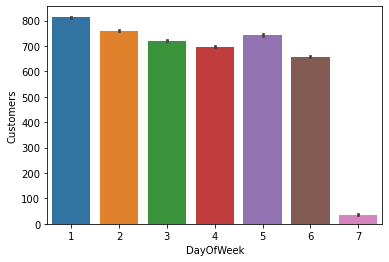

In [23]:
sns.barplot(x='DayOfWeek',y='Customers',data=df_sale)
plt.show()

Sunday has maximum sales

In [24]:
df_sale.groupby('DayOfWeek')['Sales'].max()

DayOfWeek
1    41551
2    34692
3    33151
4    38367
5    38722
6    31683
7    37376
Name: Sales, dtype: int64

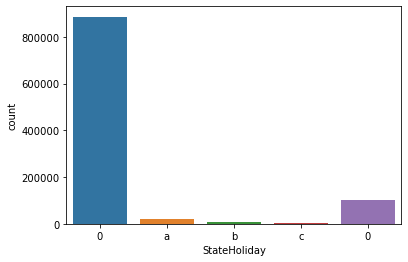

In [25]:
sns.countplot(x='StateHoliday',data=df_sale)
plt.show()

From the dataset, we donot have clear description about StateHoliday. So, let's drop it and replace it using USFederalHoliday

In [26]:
df_sale=df_sale.drop('StateHoliday',axis=1)

In [27]:
df_sale.Date.min(),df_sale.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [28]:
#pip install holidays

In [29]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start='2013-01-01', end='2015-07-31')
df = pd.DataFrame()
df['Date'] = dr

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

df['Holiday'] = df['Date'].isin(holidays)
print(df)

          Date  Holiday
0   2013-01-01     True
1   2013-01-02    False
2   2013-01-03    False
3   2013-01-04    False
4   2013-01-05    False
..         ...      ...
937 2015-07-27    False
938 2015-07-28    False
939 2015-07-29    False
940 2015-07-30    False
941 2015-07-31    False

[942 rows x 2 columns]


In [31]:
#Taking a backup

In [34]:
df_sale1=df_sale.copy(deep=True)

In [35]:
#merging the Date column in the original dataset

In [36]:
df_sale1=df_sale1.merge(df,on='Date',how='left')

In [37]:
df_sale1.Holiday.value_counts()

False    990415
True      26794
Name: Holiday, dtype: int64

In [38]:
df_sale1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,source,Holiday
0,1,2,2015-06-30,5735,568,1,1,0,train,False
1,2,2,2015-06-30,9863,877,1,1,0,train,False
2,3,2,2015-06-30,13261,1072,1,1,1,train,False
3,4,2,2015-06-30,13106,1488,1,1,0,train,False
4,5,2,2015-06-30,6635,645,1,1,0,train,False


In [42]:
#Converting the datatype of Holiday column to numeric

In [40]:
df_sale1['Holiday']=df_sale1['Holiday'].astype('int')

In [43]:
df_sale1.Holiday.value_counts()

0    990415
1     26794
Name: Holiday, dtype: int64

Let's extract the year, month,day from Date column

In [44]:
df_sale1=df_sale1.assign(year=pd.DatetimeIndex(df_sale1['Date']).year,
               month=pd.DatetimeIndex(df_sale1['Date']).month,
               day=pd.DatetimeIndex(df_sale1['Date']).day)

In [45]:
#Creating a backup
df_sale2=df_sale1.copy(deep=True)

In [46]:
df_sale2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,source,Holiday,year,month,day
0,1,2,2015-06-30,5735,568,1,1,0,train,0,2015,6,30
1,2,2,2015-06-30,9863,877,1,1,0,train,0,2015,6,30
2,3,2,2015-06-30,13261,1072,1,1,1,train,0,2015,6,30
3,4,2,2015-06-30,13106,1488,1,1,0,train,0,2015,6,30
4,5,2,2015-06-30,6635,645,1,1,0,train,0,2015,6,30


In [47]:
#Dropping off the Date column as we donot require it now.

df_sale2=df_sale2.drop('Date',axis=1)

In [48]:
#Checking for linear Relationships

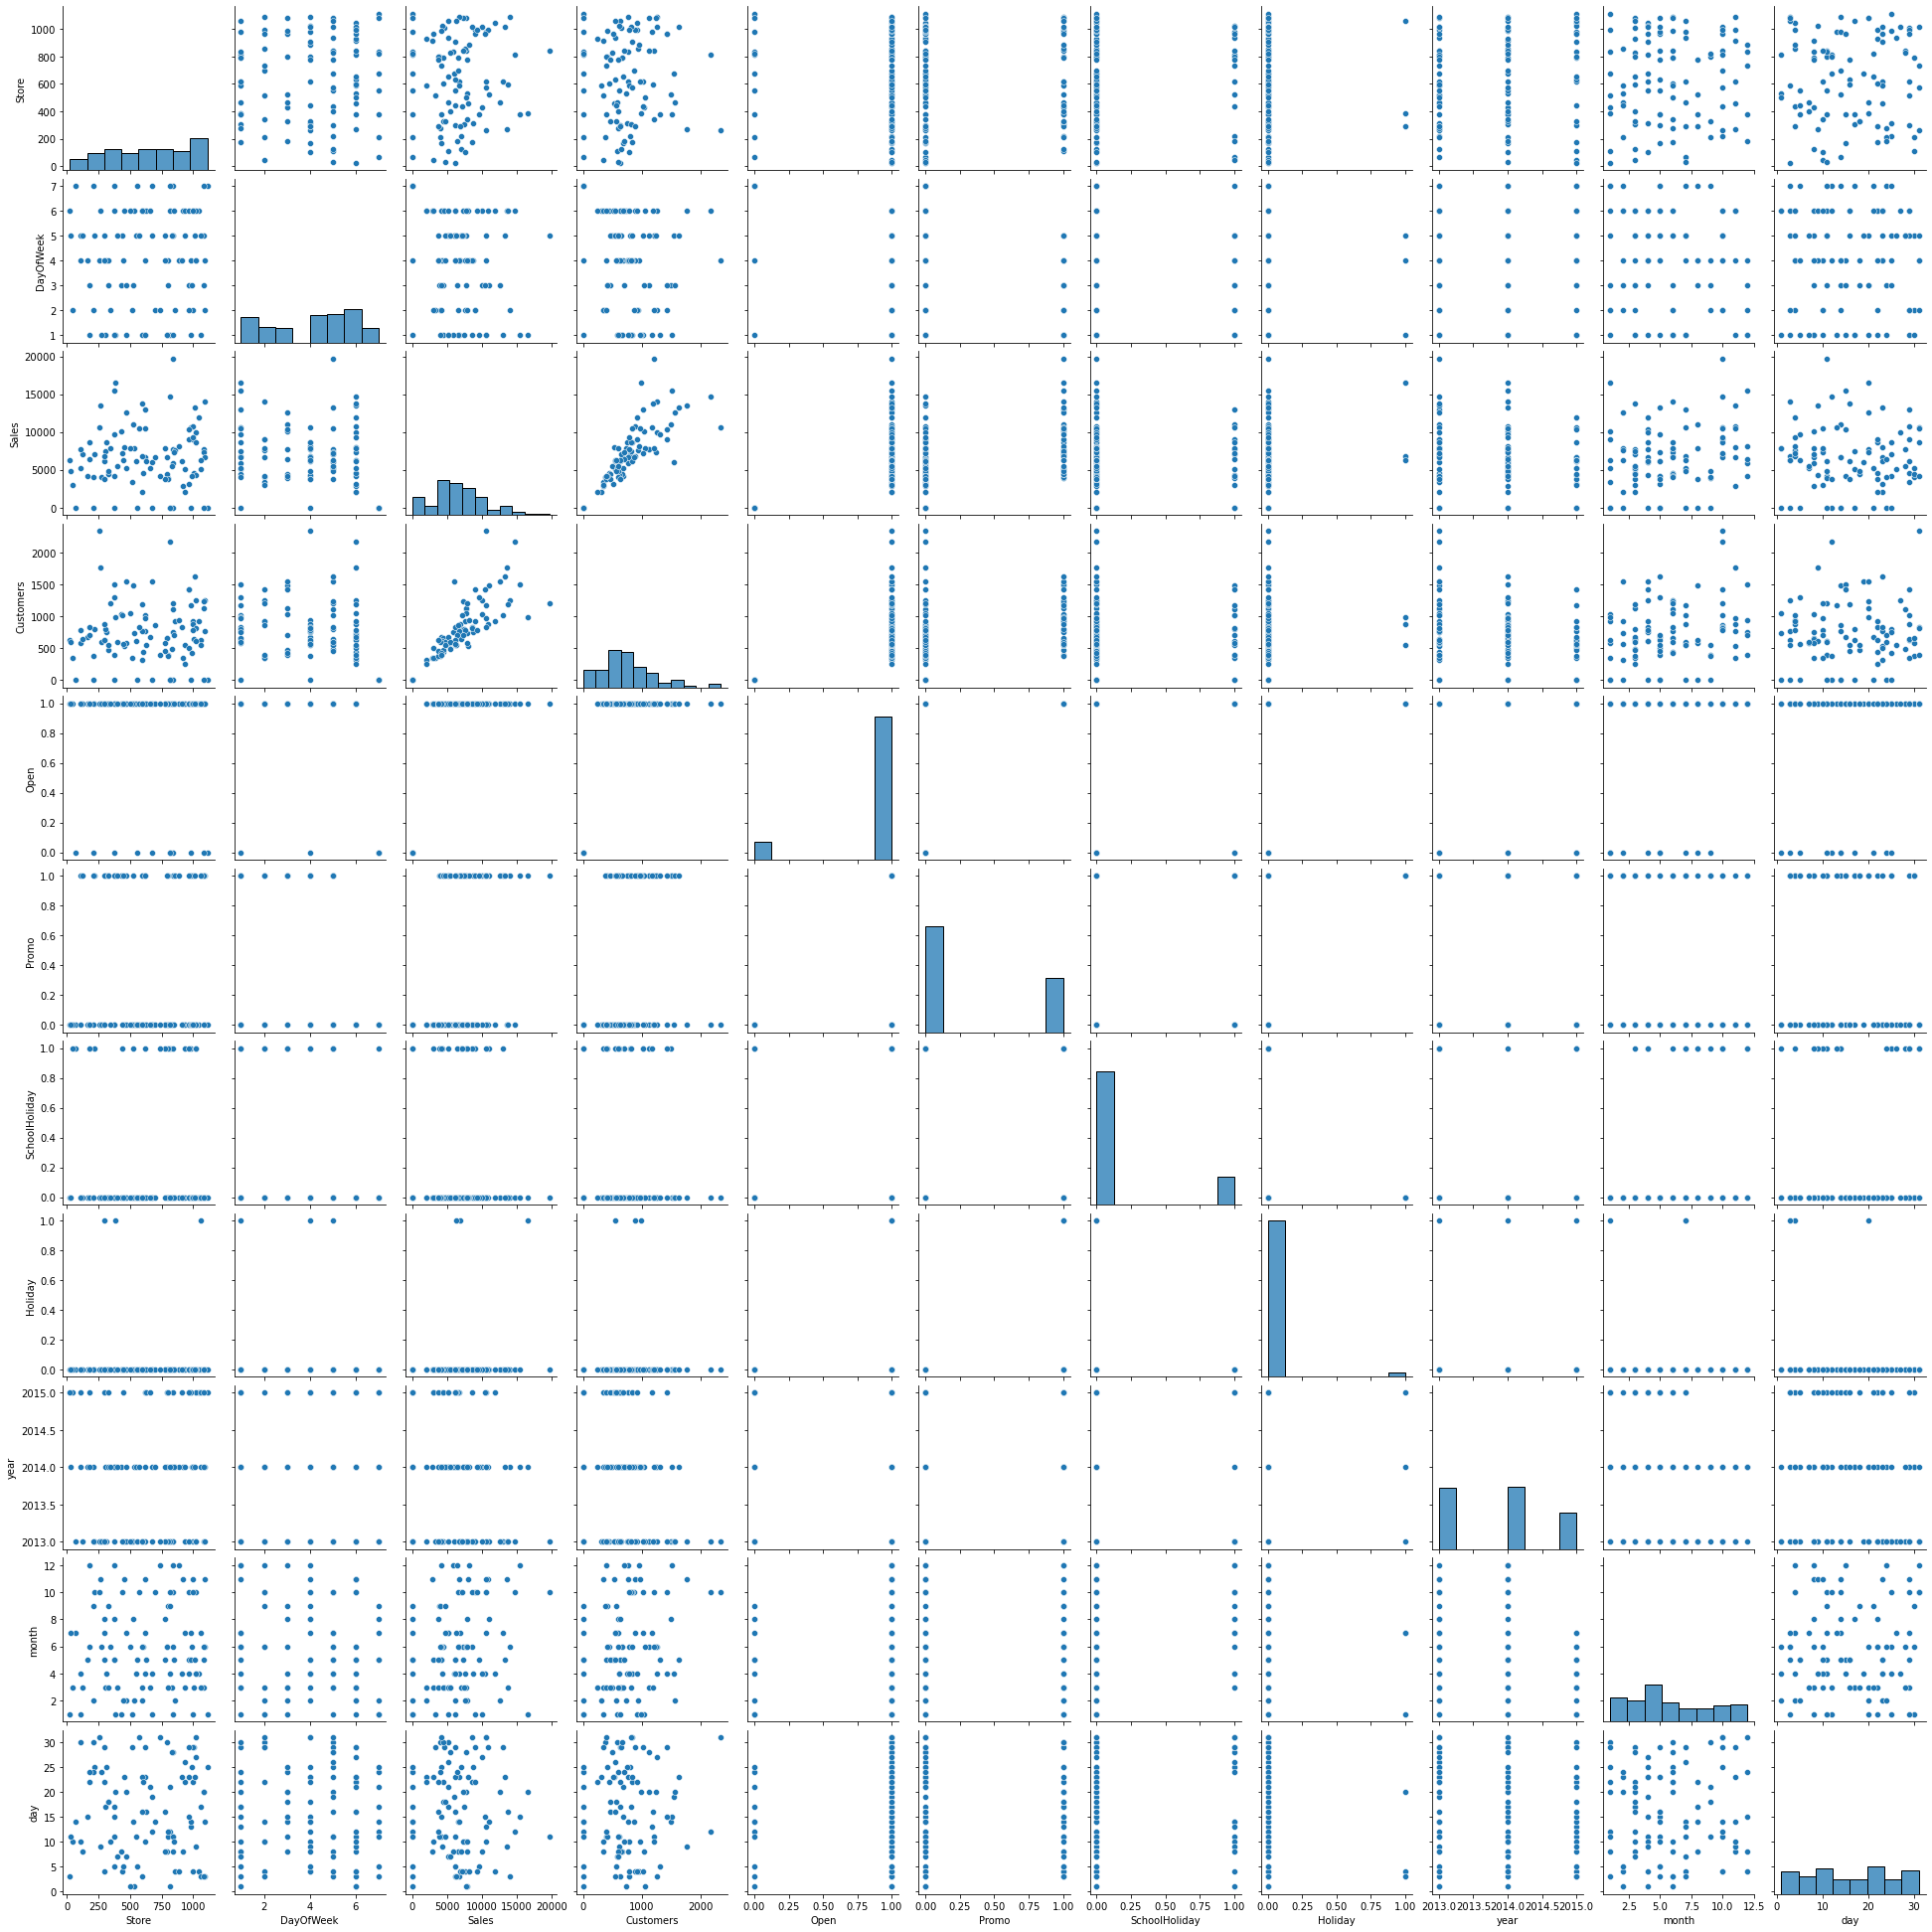

In [180]:
df_sample=df_sale1.sample(100,random_state=42)

sns.pairplot(df_sample)
plt.show()

We can see that there is a linear relationship between Sales and Customers

In [49]:
#Testing for Correlation

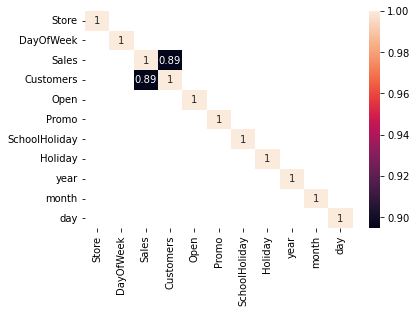

In [50]:
vcorr=df_sale2.corr()

sns.heatmap(vcorr[(vcorr<-0.80) | (vcorr>0.80)],annot=True)
plt.show()

We can see that there is a strong positive correlation between Sales and Customers.

In [184]:
#Testing for Normality(Target column)

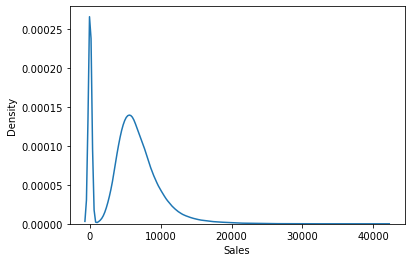

In [51]:
sns.kdeplot(x='Sales',data=df_sale2)
plt.show()

In [52]:
df_sale2.Sales.skew()

0.6414596158103801

We can see that it is slightly positively skewed. Let's take logarthimic of the particular column.

In [53]:
df_sale2['log_sales']=np.log(df_sale2['Sales'])

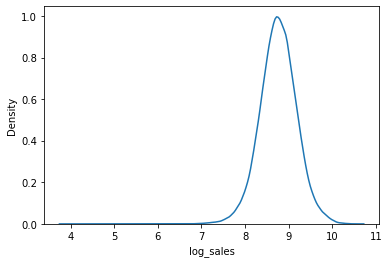

In [54]:
sns.kdeplot(x='log_sales',data=df_sale2)
plt.show()

In [55]:
#Checking for the added columns

In [195]:
df_sale2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,source,Holiday,year,month,day,log_sales
0,1,2,5735,568,1,1,0,train,0,2015,6,30,8.654343
1,2,2,9863,877,1,1,0,train,0,2015,6,30,9.196546
2,3,2,13261,1072,1,1,1,train,0,2015,6,30,9.492583
3,4,2,13106,1488,1,1,0,train,0,2015,6,30,9.480825
4,5,2,6635,645,1,1,0,train,0,2015,6,30,8.800114


## 3.Separating the Train and Test set

In [61]:
df_train=df_sale2.loc[df_sale2['source']=='train']
df_test=df_sale2.loc[df_sale2['source']=='test']

In [62]:
df_train.shape,df_test.shape

((982644, 13), (34565, 13))

In [64]:
df_train1=df_train.drop(['source'],axis=1)

In [67]:
df_test1=df_test.drop(['source'],axis=1)

## 4.Splitting into X and y

In [68]:
X_train=df_train1.drop(['Sales','log_sales'],axis=1)
y_train=df_train1[['Sales','log_sales']]

In [69]:
X_test=df_test1.drop(['Sales','log_sales'],axis=1)
y_test=df_test1[['Sales','log_sales']]

In [70]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((982644, 10), (982644, 2), (34565, 10), (34565, 2))

## 5.Scaling the Data

In [72]:
sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

## 7.Model Building

In [74]:
#With sales as target column

In [78]:
models=[LinearRegression(),SGDRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),XGBRegressor(dual=False),LGBMRegressor(),GradientBoostingRegressor()]

In [79]:
for i in range(7):
    models[i].fit(X_train,y_train['Sales'])
    
    print(f'{models[i]}: ')
    y_pred_train=models[i].predict(X_train)
    y_pred_test=models[i].predict(X_test)
    
    print('MSE_train: ',round(mean_squared_error(y_train['Sales'],y_pred_train),2))
    print('MSE_test: ',round(mean_squared_error(y_test['Sales'],y_pred_test),2))
    
    print('RMSE_train: ',round(np.sqrt(mean_squared_error(y_train['Sales'],y_pred_train)),2))
    print('RMSE_test: ',round(np.sqrt(mean_squared_error(y_test['Sales'],y_pred_test)),2))
    
    print('R2_score_train: ',round(r2_score(y_train['Sales'],y_pred_train),2))
    print('R2_score_test: ',round(r2_score(y_test['Sales'],y_pred_test),2))
    
    print()

LinearRegression(): 
MSE_train:  2165919.14
MSE_test:  2309289.46
RMSE_train:  1471.71
RMSE_test:  1519.63
R2_score_train:  0.85
R2_score_test:  0.82

SGDRegressor(): 
MSE_train:  1.0448513812124894e+28
MSE_test:  1.0342975782669863e+28
RMSE_train:  102217972060322.6
RMSE_test:  101700421742831.84
R2_score_train:  -7.021445944228375e+20
R2_score_test:  -7.952810788596271e+20

DecisionTreeRegressor(): 
MSE_train:  0.0
MSE_test:  1482036.59
RMSE_train:  0.0
RMSE_test:  1217.39
R2_score_train:  1.0
R2_score_test:  0.89

RandomForestRegressor(): 
MSE_train:  78522.21
MSE_test:  782063.05
RMSE_train:  280.22
RMSE_test:  884.34
R2_score_train:  0.99
R2_score_test:  0.94

[20:45:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "dual" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used


We can see that the XGB Regressor has performed the best with model R2 score of 95%.

Let's try to consider those data points where sales are higher than 0 and rebuild the model.

In [80]:
#Dropping the rows when Sales are 0

In [81]:
df_sale3=df_sale2.copy(deep=True)

In [82]:
df_sale3=df_sale3[df_sale3['Sales']>0]

In [83]:
df_sale3.shape

(844338, 13)

In [84]:
#Separating the train and test set

In [85]:
df_train=df_sale3.loc[df_sale3['source']=='train']
df_test=df_sale3.loc[df_sale3['source']=='test']

In [86]:
df_train2=df_train.drop(['source'],axis=1)

In [87]:
df_test2=df_test.drop(['source'],axis=1)

In [88]:
X_train=df_train2.drop(['Sales','log_sales'],axis=1)
y_train=df_train2[['Sales','log_sales']]

In [90]:
X_test=df_test2.drop(['Sales','log_sales'],axis=1)
y_test=df_test2[['Sales','log_sales']]

In [91]:
sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [92]:
#Model Building using Sales as target column

In [93]:
models=[LinearRegression(),SGDRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),XGBRegressor(dual=False),LGBMRegressor(),GradientBoostingRegressor()]

In [94]:
for i in range(7):
    models[i].fit(X_train_scaled,y_train['Sales'])
    
    print(f'{models[i]}: ')
    y_pred_train=models[i].predict(X_train_scaled)
    y_pred_test=models[i].predict(X_test_scaled)
    
    print('MSE_train: ',round(mean_squared_error(y_train['Sales'],y_pred_train),2))
    print('MSE_test: ',round(mean_squared_error(y_test['Sales'],y_pred_test),2))
    
    print('RMSE_train: ',round(np.sqrt(mean_squared_error(y_train['Sales'],y_pred_train)),2))
    print('RMSE_test: ',round(np.sqrt(mean_squared_error(y_test['Sales'],y_pred_test)),2))
    
    print('R2_score_train: ',round(r2_score(y_train['Sales'],y_pred_train),2))
    print('R2_score_test: ',round(r2_score(y_test['Sales'],y_pred_test),2))
    
    print()

LinearRegression(): 
MSE_train:  2580287.27
MSE_test:  2641200.76
RMSE_train:  1606.33
RMSE_test:  1625.18
R2_score_train:  0.73
R2_score_test:  0.69

SGDRegressor(): 
MSE_train:  2582177.52
MSE_test:  2654222.18
RMSE_train:  1606.92
RMSE_test:  1629.18
R2_score_train:  0.73
R2_score_test:  0.69

DecisionTreeRegressor(): 
MSE_train:  0.0
MSE_test:  1779196.8
RMSE_train:  0.0
RMSE_test:  1333.87
R2_score_train:  1.0
R2_score_test:  0.79

RandomForestRegressor(): 
MSE_train:  94963.02
MSE_test:  904110.78
RMSE_train:  308.16
RMSE_test:  950.85
R2_score_train:  0.99
R2_score_test:  0.9

[21:55:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "dual" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases

In [97]:
#Building Models using log Sales as target column

In [99]:
 for i in range(7):
    models[i].fit(X_train_scaled,y_train['log_sales'])
    
    print(f'{models[i]}: ')
    y_pred_train=models[i].predict(X_train_scaled)
    y_pred_exp_train=np.exp(y_pred_train)
    y_pred_test=models[i].predict(X_test_scaled)
    y_pred_exp_test=np.exp(y_pred_test)
    
    print('MSE_train: ',mean_squared_error(y_train['Sales'],y_pred_exp_train))
    print('MSE_test: ',mean_squared_error(y_test['Sales'],y_pred_exp_test))
    
    print('RMSE_train: ',np.sqrt(mean_squared_error(y_train['Sales'],y_pred_exp_train)))
    print('RMSE_test: ',np.sqrt(mean_squared_error(y_test['Sales'],y_pred_exp_test)))
    
    print('R2_score_train: ',r2_score(y_train['Sales'],y_pred_exp_train))
    print('R2_score_test: ',r2_score(y_test['Sales'],y_pred_exp_test))
    
    print()

LinearRegression(): 
MSE_train:  10189906.622305743
MSE_test:  10370532.47163515
RMSE_train:  3192.1633138524953
RMSE_test:  3220.3311121117886
R2_score_train:  -0.05368236242664759
R2_score_test:  -0.20211072343664171

SGDRegressor(): 
MSE_train:  9227926.204300174
MSE_test:  9456945.720068634
RMSE_train:  3037.750187935172
RMSE_test:  3075.214743732319
R2_score_train:  0.04579075710454228
R2_score_test:  -0.09621139436635762

DecisionTreeRegressor(): 
MSE_train:  1.5313627160808053e-23
MSE_test:  1707925.5734066512
RMSE_train:  3.913262981299373e-12
RMSE_test:  1306.8762655303872
R2_score_train:  1.0
R2_score_test:  0.8020240858182193

RandomForestRegressor(): 
MSE_train:  99052.73832708834
MSE_test:  853342.0746679966
RMSE_train:  314.7264499960058
RMSE_test:  923.7651620774603
R2_score_train:  0.9897574995342108
R2_score_test:  0.9010839933702722

[22:42:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "dual" } might not b

We can see that for both the cases, XGBRegressor has performed the best with model R2 score of 91%.